<a href="https://colab.research.google.com/github/Dora-la-exploradora/Courses-ML/blob/master/ML(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Группировка и агрегация

1.6.1 Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs), и заполните их число в задании ниже.

In [0]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv")
df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [0]:
df.groupby('legs').aggregate({"localized_name" : "count"})

,localized_name
legs,
0,11
2,95
4,7
6,3
8,1


1.6.2 К нам поступили данные из бухгалтерии о заработках Лупы и Пупы за разные задачи! Посмотрите у кого из них больше средний заработок в различных категориях (колонка Type) и заполните таблицу, указывая исполнителя с большим заработком в каждой из категорий.

In [0]:
pupa = pd.read_csv("https://stepik.org/media/attachments/course/4852/accountancy.csv")
pupa.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [0]:
pupa.groupby(['Type', 'Executor']).aggregate({"Salary" : "count"})

Salary
Type Executor        
A    Loopa          1
     Pupa           6
B    Loopa          6
     Pupa           1
C    Loopa          6
     Pupa           2
D    Loopa          7
     Pupa           4
E    Loopa          6
     Pupa           5
F    Loopa          2
     Pupa           4

1.6.3 Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик.

In [0]:
df.groupby(['attack_type', 'primary_attr']).aggregate({"name" : "count"})

name
attack_type primary_attr      
Melee       agi             19
            int              2
            str             35
Ranged      agi             18
            int             40
            str              3

1.6.4 Пользуясь предыдущими данными, укажите через пробел (без запятых) чему равны минимальная, средняя и максимальная концентрации аланина (alanin) среди видов рода Fucus. Округлите до 2-ого знака, десятичным разделителем является точка.

In [0]:
fucus = pd.read_csv("http://stepik.org/media/attachments/course/4852/algae.csv")
fucus.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [0]:
fucus.groupby('genus').agg(['min', 'mean', 'max']).loc['Fucus', 'alanin'].round(2)

min     0.35
mean    3.57
max     6.64
Name: Fucus, dtype: float64

1.6.5 Сгруппируйте данные по переменной group и соотнесите вопросы с ответами

In [0]:
fucus.groupby('group') \
    .agg({'citrate': 'var', 'sucrose': lambda x: x.max() - x.min(), 'glucose': 'count'}) \
    .round(2)

,citrate,sucrose,glucose
group,,,
brown,5.47,5.19,6
green,3.95,3.26,3
red,NaN,0.00,1


Визуализация

1.7 Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.

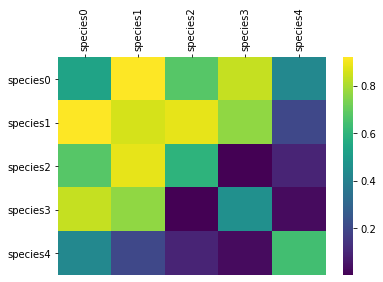

In [0]:
s=pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv',index_col=0)

g=sns.heatmap(data=s, cmap='viridis')

g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

1.7.2 Пришло время узнать, какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

In [0]:
# в pandas есть возможность поэлементной работы с текстом для Series через атрибут str
df.roles.str.split(',').apply(len).mode()

0    4
dtype: int64

1.7.3 Теперь перейдём к цветочкам. Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

In [0]:
flowers = pd.read_csv("https://stepik.org/media/attachments/course/4852/iris.csv")
flowers = flowers.rename(columns ={'sepal length': 'sepal_length','sepal width': 'sepal_width','petal length': 'petal_length', "petal width": "petal_width"})
flowers.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


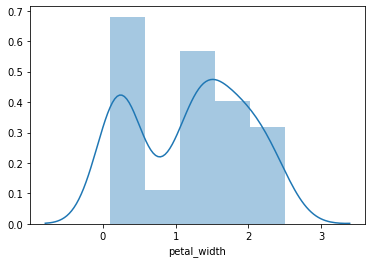

In [0]:
column = flowers.petal_width
sns.distplot(column)

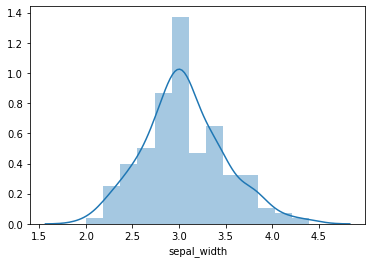

In [0]:
column = flowers.sepal_width
sns.distplot(column)

1.7.4 Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота и выберите правильный (такой же) вариант среди предложенных

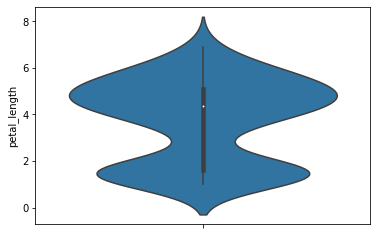

In [0]:
column = flowers.petal_length
sns.violinplot(column, orient='v')

1.7.5 Продолжаем изучение ирисов! Ещё один важный тип графиков - pairplot, отражающий зависимость пар переменных друг от друга, а также распределение каждой из переменных. Постройте его и посмотрите на scatter плоты для каждой из пар фичей. Какая из пар навскидку имеет наибольшую корреляцию?

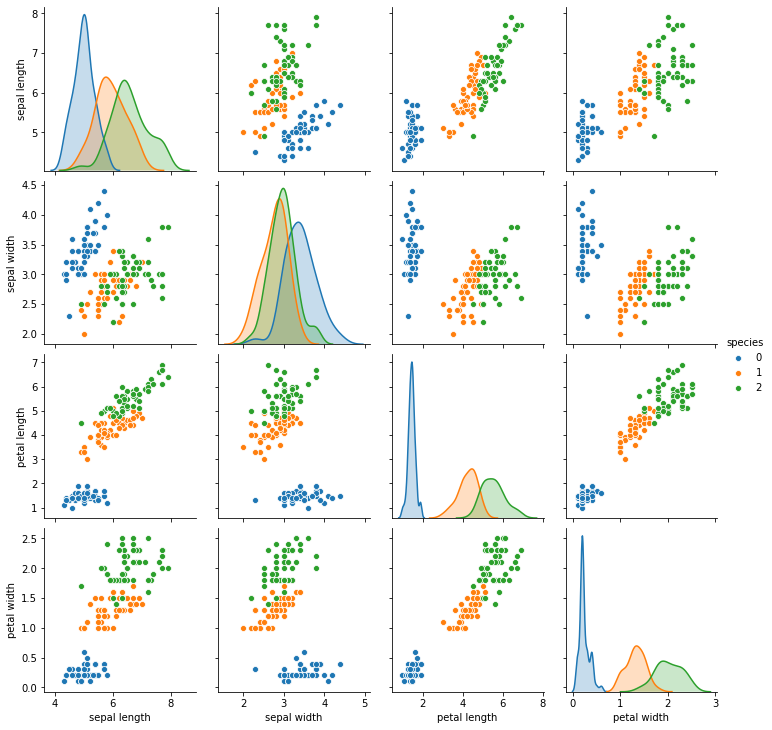

In [0]:
flowers = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)
sns.pairplot(flowers, vars=flowers.columns[:4], hue="species")